# I. Condorcet's Jury Theorem (1785)

Assume voter probability be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging)

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers)

# II. AdaBoost From Scratch


*   Implement the AdaBoost algorithm for classification task. Your `AdaBoost` class should receive a method for creating a weak learner, which has a fit and predict methods (**hint**: you can simulate re-weighting of the samples by an appropriate re-sampling of the train set).
*   Use your model to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` with the default parameters). 
    - Split the sample set into train and test sets.
    - Plot the final decision plane of your classifier for $n\in \{1, 2, 3, 5, 10, 50\}$, and visualize the final iteration weights of the samples in those plots.
    - How does the overall train set accuracy changes with $n$?
    - Does you model starts to overfit at some point?


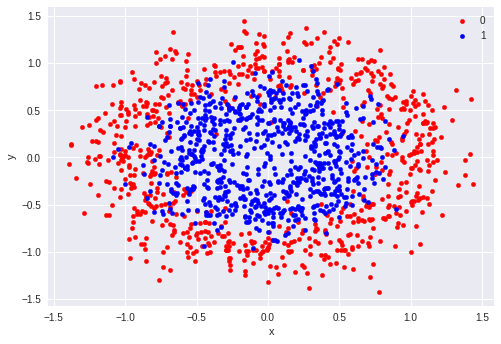

In [0]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=1500, noise=0.2, random_state=101, factor=0.5)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [0]:
# Answer...

# III. Boosting Trees from Scratch
* Use the scikit-learn's DecisionTreeRegressor with `max_depth = 1` (stumps)  to write a L2Boost model which minimize the L2 square loss iteration by iteration.
Reminder: in each step, build a decision tree to minimize the error between the true label and the accumulated (sum) of the previous step predictions.
![alt text](https://explained.ai/gradient-boosting/images/latex-321A7951E78381FB73D2A6874916134D.svg)
* Use the Boston dataset to plot the MSE as a function of the number of trees for a logspace of `n_trees` up to 1,000. What is the optimal value of `n_trees`? of learning rate?
* Compare the performance with a deep DecisionTreeRegressor (find the optimal `max_depth`).  Who wins?
* **Optional**: add an early-stopping mechanisim to the GBTL2 model to use a validation set to detect over-fit.

In [0]:

from sklearn.tree import DecisionTreeRegressor
import numpy as np

class SimpleModel:

    def __init__(self, prev_model, mu):
        self.prev_model = prev_model
        self.mu = mu
        self.mode=  None

    def fit(self, X, y):
        target = y - self.prev_model.predict(X)
        self.model = DecisionTreeRegressor(max_depth=1)
        self.model.fit(X, target)

    def predict(self, X):
        return self.prev_model.predict(X) + self.mu * self.model.predict(X)


class MeanModel:

    def __init__(self):
        self.mode=  None

    def fit(self, X, y):
        mean = np.mean(X)

        self.model = lambda x: np.repeat(mean, len(x))

    def predict(self, X):
        return self.model(X)



class L2Boost:

    def __init__(self, M, mu):
        self.M = M
        self.mu = mu
        self.model = None

    def fit(self, X, y):

        self.model = MeanModel()
        self.model.fit(X, y)

        for i in range(self.M):
            current = SimpleModel(self.model, self.mu)
            current.fit(X, y)
            self.model = current

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        predicions = self.predict(X)
        mse = np.mean(np.square(y - predicions))

        return mse



In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
X, y = load_boston(return_X_y=True)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=999)

In [6]:
model = L2Boost(1000, 0.01)
model.fit(X_train, y_train)
model.score(X_test, y_test)

RecursionError: ignored